# WeatherPy
----


In [4]:
# import api key and all important modules
from api_keys import weather_api_key 

from citipy import citipy
import random
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

# set plot style
plt.style.use('seaborn-colorblind')

## Generate Cities List

In [5]:
# make a list of 500 unique cities from random lat-long pairs
cities = []
while len(cities) < 500:
    # put in random lat-long and get city
    city_obj = citipy.nearest_city(random.uniform(-90,90), random.uniform(-180,180))
    city = (city_obj.city_name, city_obj.country_code)
    
    # check if city is already in the list or not
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# function to create api query url
def make_url(name, country):
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    url = f"{base_url}{name},{country}&appid={weather_api_key}"
    return url

In [7]:
# list to put resupts in
data = []

# loop through cities list and get openweather data 
for index, city in enumerate(cities):
    print(f"Processing City {index + 1} | {city[0]}")    
    url = make_url(city[0], city[1])
    response = requests.get(url)
    
    # if error 
    if response.status_code > 399:
        print("City not found. Skipping...")
        
    else:
        data.append(response.json())

# note: this will result in less than 500 cities output for the graphs -
# I read the instructions as saying I only need to select 500 non-unique cities,
# not that I need 500 for graphing. So the below data is probably ~450 cities.
    


Processing City 1 | ler
City not found. Skipping...
Processing City 2 | kodiak
Processing City 3 | arlit
Processing City 4 | new norfolk
Processing City 5 | plettenberg bay
Processing City 6 | clyde river
Processing City 7 | kantunilkin
Processing City 8 | mataura
City not found. Skipping...
Processing City 9 | singaparna
Processing City 10 | nowy targ
Processing City 11 | hithadhoo
Processing City 12 | rikitea
Processing City 13 | buchanan
Processing City 14 | jalu
Processing City 15 | hermanus
Processing City 16 | port hawkesbury
Processing City 17 | bredasdorp
Processing City 18 | naze
Processing City 19 | sataua
City not found. Skipping...
Processing City 20 | paamiut
Processing City 21 | thompson
Processing City 22 | ushuaia
Processing City 23 | yellowknife
Processing City 24 | saskylakh
Processing City 25 | dikson
Processing City 26 | albany
Processing City 27 | severnoye
Processing City 28 | batagay
Processing City 29 | port alfred
Processing City 30 | carnarvon
Processing City 

Processing City 239 | san patricio
Processing City 240 | novaya igirma
Processing City 241 | lengshuitan
Processing City 242 | provideniya
Processing City 243 | tasiilaq
Processing City 244 | uarini
Processing City 245 | castro
Processing City 246 | bolshegrivskoye
City not found. Skipping...
Processing City 247 | victoria
Processing City 248 | westport
Processing City 249 | alice springs
Processing City 250 | muhos
Processing City 251 | yamada
Processing City 252 | gladstone
Processing City 253 | mgandu
Processing City 254 | tuatapere
Processing City 255 | natal
Processing City 256 | siteki
Processing City 257 | codrington
City not found. Skipping...
Processing City 258 | huilong
Processing City 259 | haines junction
Processing City 260 | turukhansk
Processing City 261 | medvedok
Processing City 262 | chegdomyn
Processing City 263 | pozo colorado
Processing City 264 | palamos
Processing City 265 | katangli
Processing City 266 | ajdabiya
Processing City 267 | nuevo imperial
Processing 

Processing City 483 | ahipara
Processing City 484 | gamba
Processing City 485 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing City 486 | karauzyak
City not found. Skipping...
Processing City 487 | shimoda
Processing City 488 | dawlatabad
Processing City 489 | lokosovo
Processing City 490 | verkh-usugli
Processing City 491 | gizo
Processing City 492 | biak
Processing City 493 | loandjili
Processing City 494 | tombouctou
Processing City 495 | smolenka
Processing City 496 | tanout
Processing City 497 | verin
Processing City 498 | saint-philippe
Processing City 499 | birjand
Processing City 500 | qostanay


In [48]:
# make list of dicts in order to convert to dataframe

datalist = []
for d in data:
    # convert temperature to fahrenheit (from Kelvin)
    temp = d['main']['temp_max']
    fahr_temp = (temp - 273.15) * 1.8 + 32
    
    # dict keys are formatted such that they can be used directly as axis labels
    currdict = {"City": d['name'],
                "Latitude": d['coord']['lat'],
                "Longitude": d['coord']['lon'],
                "Max Temperature": fahr_temp,
                "Humidity": d['main']['humidity'],
                "Windspeed": d['wind']['speed'],
                "Cloudiness": d['clouds']['all'],
                "Date": d['dt'],
                "Country": d['sys']['country']}
    datalist.append(currdict)

units = {"Max Temperature": "F", "Humidity": "%", "Windspeed": "mph", "Cloudiness": "%"}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# convert to dataframe and export to csv
df = pd.DataFrame(datalist)
df.to_csv("weather_data.csv", index = False)

df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Windspeed,Cloudiness,Date,Country
0,Saint Paul Harbor,57.79,-152.41,46.400,61,2.10,90,1602974083,US
1,Arlit,18.74,7.39,90.806,12,3.04,0,1602974132,NE
2,New Norfolk,-42.78,147.06,51.008,96,3.13,59,1602974132,AU
3,Plettenberg Bay,-34.05,23.37,59.738,87,4.19,96,1602974133,ZA
4,Clyde River,70.47,-68.59,37.400,74,7.70,75,1602974133,CA


In [15]:
# look at summary stats
df.describe()

# notably, humidity max is 100 so we don't need to remove humidities above 100

,Latitude,Longitude,Max Temperature (F),Humidity (%),Windspeed (mph),Cloudiness (%),Date
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,4.470000e+02
mean,20.506152,18.517539,59.230577,74.093960,3.771499,53.055928,1.602974e+09
std,34.642963,92.156315,20.943598,20.475407,2.590569,38.753261,8.608306e+01
min,-54.800000,-175.200000,3.902000,1.000000,0.110000,0.000000,1.602974e+09
25%,-8.015000,-64.270000,41.000000,65.500000,1.845000,14.500000,1.602974e+09
50%,21.390000,21.680000,63.104000,79.000000,3.130000,62.000000,1.602974e+09
75%,52.140000,99.850000,78.269000,89.000000,5.155000,90.000000,1.602974e+09
max,78.220000,179.320000,91.400000,100.000000,16.500000,100.000000,1.602974e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [50]:
# define function to plot and label any variable vs latitude
def plots(var):
    fig, ax = plt.subplots()
    ax.scatter(df['Latitude'], df[var])
    ax.set(xlabel = "Latitude",
          ylabel = f"{var} ({units[var]})",
          title = f"City Latitude vs {var} | 10/17/2020")

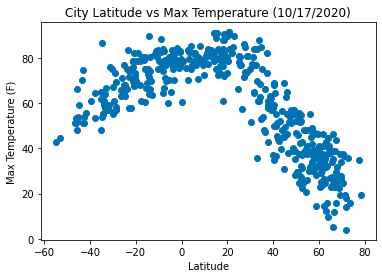

In [51]:
plots("Max Temperature")

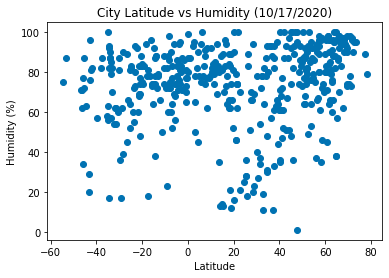

In [52]:
plots("Humidity")

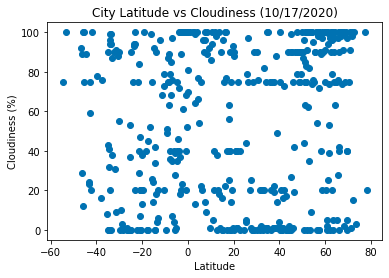

In [53]:
plots("Cloudiness")

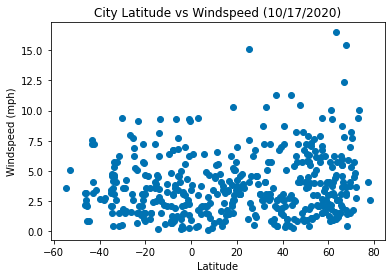

In [54]:
plots("Windspeed")

## Linear Regression

In [55]:
# filter dataset into northern and southern hemisphere
Northern = df[df['Latitude'] > 0]
Southern = df[df['Latitude'] < 0]

dict_key = {"Northern": Northern, "Southern": Southern}

# define function to calculate and plot linear regression over scatterplot, vs latitude
# inputs are STRINGS

def regress(hemi, var):
    hemi_data = dict_key[hemi] #look up dataset
    x = hemi_data['Latitude']
    y = hemi_data[var]
    
    # calculate repression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress = x * slope + intercept
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, regress, color = "green")
    
    # format
    ax.set(xlabel = "Latitude",
          ylabel = f"{var} ({units[var]})",
          title = f"Latitude vs {var}: {hemi} Hemisphere")
    
    # print rvalue and equation
    print(f"The r-value is: {rvalue}")
    print(f"y = {round(slope,2)}x + {round(intercept,2)}")
    # @TODO: plot equation over graph
    

The r-value is: -0.8872029582988356
y = -0.98x + 94.43


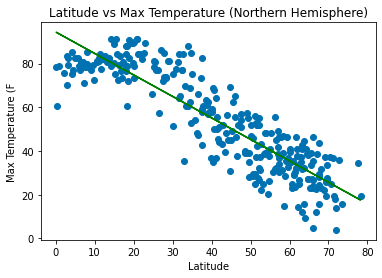

In [56]:
regress("Northern", 'Max Temperature')

The r-value is: 0.7512413220990948
y = 0.56x + 81.39


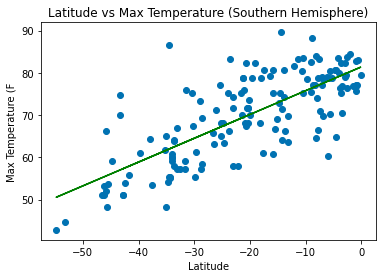

In [57]:
regress("Southern", 'Max Temperature')

The r-value is: 0.24772014203495227
y = 0.27x + 63.67


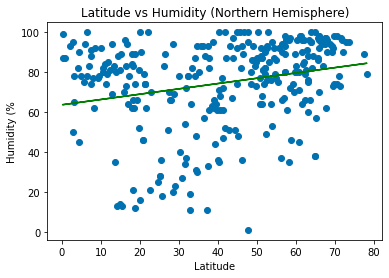

In [58]:
regress("Northern", 'Humidity')

The r-value is: 0.1674721611471652
y = 0.2x + 77.12


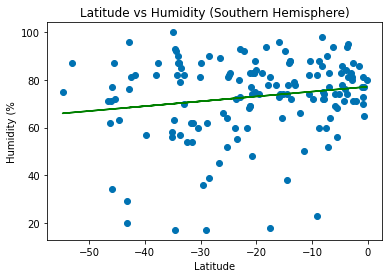

In [59]:
regress("Southern", 'Humidity')

The r-value is: 0.1477121805040354
y = 0.02x + 3.1


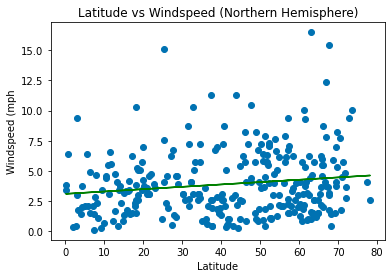

In [60]:
regress("Northern", 'Windspeed')

The r-value is: -0.01685046065546296
y = -0.0x + 3.45


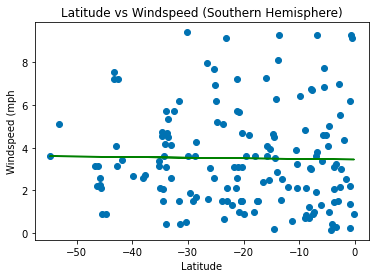

In [61]:
regress("Southern", 'Windspeed')

The r-value is: 0.1778544073418911
y = 0.35x + 40.85


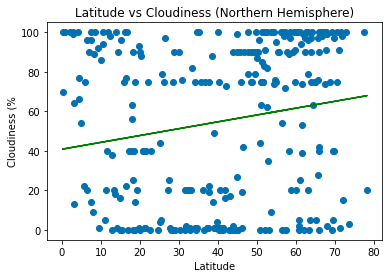

In [62]:
regress("Northern", 'Cloudiness')

The r-value is: -0.017493625840237743
y = -0.05x + 48.01


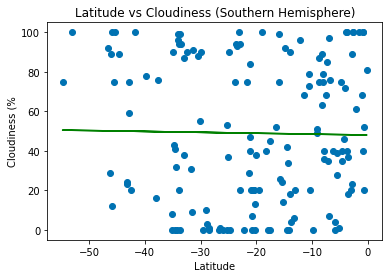

In [63]:
regress("Southern", 'Cloudiness')

In [64]:
# @TODO: pngs 